# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [4]:
df['sex'] = df.sex.map({1: 'Famale', 0: 'Male'})
tab = pd.crosstab(df['sex'], df['flag_doente'], margins= True)
tab

flag_doente,0,1,All
sex,,,
Famale,92,114,206
Male,72,25,97
All,164,139,303


In [5]:
# Número de saudáveis

tab[0]

sex
Famale     92
Male       72
All       164
Name: 0, dtype: int64

In [6]:
# Número de Doentes
tab[1]

sex
Famale    114
Male       25
All       139
Name: 1, dtype: int64

In [7]:
# Número total de pacientes
tab['All']

sex
Famale    206
Male       97
All       303
Name: All, dtype: int64

In [8]:
# Quantidade média de saudáveis

tab['media_healthy'] = tab[0]/ tab['All']
tab

flag_doente,0,1,All,media_healthy
sex,,,,
Famale,92,114,206,0.446602
Male,72,25,97,0.742268
All,164,139,303,0.541254


In [9]:
# Quantidade média de doentes

tab['media_sick'] = tab[1]/ tab['All']
tab

flag_doente,0,1,All,media_healthy,media_sick
sex,,,,,
Famale,92,114,206,0.446602,0.553398
Male,72,25,97,0.742268,0.257732
All,164,139,303,0.541254,0.458746


In [10]:
# Odds

tab['Odds'] = tab[1]/tab[0]
tab

flag_doente,0,1,All,media_healthy,media_sick,Odds
sex,,,,,,
Famale,92,114,206,0.446602,0.553398,1.239130
Male,72,25,97,0.742268,0.257732,0.347222
All,164,139,303,0.541254,0.458746,0.847561


In [11]:
# Odds ratio (Usando o total como referência)

tab['Odds ratio'] = tab['Odds']/tab.loc['All','Odds']
tab

flag_doente,0,1,All,media_healthy,media_sick,Odds,Odds ratio
sex,,,,,,,
Famale,92,114,206,0.446602,0.553398,1.239130,1.461996
Male,72,25,97,0.742268,0.257732,0.347222,0.409672
All,164,139,303,0.541254,0.458746,0.847561,1.000000


In [12]:
# Logito (LOG(Odds))

tab['logito'] = np.log(tab['Odds'])
tab

flag_doente,0,1,All,media_healthy,media_sick,Odds,Odds ratio,logito
sex,,,,,,,,
Famale,92,114,206,0.446602,0.553398,1.239130,1.461996,0.214410
Male,72,25,97,0.742268,0.257732,0.347222,0.409672,-1.057790
All,164,139,303,0.541254,0.458746,0.847561,1.000000,-0.165392


In [13]:
# O LOG do Odds ratio (com o total como referência) é chamado de Weight of Evidence (WOE). Calcule-o.

tab['WOE'] = np.log(tab['Odds ratio'])
tab

flag_doente,0,1,All,media_healthy,media_sick,Odds,Odds ratio,logito,WOE
sex,,,,,,,,,
Famale,92,114,206,0.446602,0.553398,1.239130,1.461996,0.214410,0.379802
Male,72,25,97,0.742268,0.257732,0.347222,0.409672,-1.057790,-0.892398
All,164,139,303,0.541254,0.458746,0.847561,1.000000,-0.165392,0.000000


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [14]:
df['age'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1])

0.0    29.0
0.2    45.0
0.4    53.0
0.6    58.0
0.8    62.0
1.0    77.0
Name: age, dtype: float64

In [15]:
df['Idade'] = np.where(df['age'] < 45, '29 a 44', np.where(df['age'] < 53, '45 a 53',
                        np.where(df['age'] < 58, '54 a 57', np.where(df['age'] < 63, '58 a 62', '63 a 77'))))

tab_age = pd.crosstab(df['Idade'], df['flag_doente'], margins= True)
tab_age

flag_doente,0,1,All
Idade,,,
29 a 44,41,14,55
45 a 53,42,22,64
54 a 57,31,29,60
58 a 62,20,44,64
63 a 77,30,30,60
All,164,139,303


In [16]:
print('Número de saudáveis: \n', tab_age[0])
print('\nNúmero de doentes: \n', tab_age[1])
print('\nNúmero de todos os paciêntes: \n', tab_age['All'])

tab_age['media_healthy'] = tab_age[0]/ tab_age['All']
print('\nQuantidade média de saudáveis: \n', tab_age['media_healthy'])

tab_age['media_sick'] = tab_age[1]/ tab_age['All']
print('\nQuantidade média de doentes: \n', tab_age['media_sick'])

tab_age['Odds'] = tab_age[1]/tab_age[0]
print('\nOdds \n', tab_age['Odds'])

tab_age['Odds ratio'] = tab_age['Odds']/tab_age.loc['All','Odds']
print('\nOdds ratio (Usando o total como referência) \n', tab_age['Odds ratio'])

tab_age['logito'] = np.log(tab_age['Odds'])
print('\nLogito (LOG(Odds)) \n', tab_age['logito'])

# O LOG do Odds ratio (com o total como referência) é chamado de Weight of Evidence (WOE). Calcule-o.

tab_age['WOE'] = np.log(tab_age['Odds ratio'])
print('\nO LOG do Odds ratio (com o total como referência) \n', tab_age['WOE'])

# A média da variável 'age'
# Calcular a média de idade para cada intervalo de quantis
quartis = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
medias_idade = []

for i in range(len(quartis) - 1):
    media = df['age'].quantile([quartis[i], quartis[i+1]]).mean()
    medias_idade.append(media)

# Calcular a média geral de idade
media_geral = df['age'].mean()

# Adicionar a média geral à lista de médias de idade
medias_idade.append(media_geral)

# Criar um DataFrame temporário para armazenar as médias de idade
intervalos_idade = ['29 a 44', '45 a 53', '54 a 57', '58 a 62', '63 a 77', 'All']
temp_df = pd.DataFrame({'Idade': intervalos_idade, 'media_idade': medias_idade})

# Converter a coluna 'media_idade' para int
temp_df['media_idade'] = temp_df['media_idade'].astype(int)

# Mesclar a tabela tab_age com temp_df
tab_age = tab_age.merge(temp_df, on='Idade', how='left')

# Exibir a tabela resultante
tab_age

Número de saudáveis: 
 Idade
29 a 44     41
45 a 53     42
54 a 57     31
58 a 62     20
63 a 77     30
All        164
Name: 0, dtype: int64

Número de doentes: 
 Idade
29 a 44     14
45 a 53     22
54 a 57     29
58 a 62     44
63 a 77     30
All        139
Name: 1, dtype: int64

Número de todos os paciêntes: 
 Idade
29 a 44     55
45 a 53     64
54 a 57     60
58 a 62     64
63 a 77     60
All        303
Name: All, dtype: int64

Quantidade média de saudáveis: 
 Idade
29 a 44    0.745455
45 a 53    0.656250
54 a 57    0.516667
58 a 62    0.312500
63 a 77    0.500000
All        0.541254
Name: media_healthy, dtype: float64

Quantidade média de doentes: 
 Idade
29 a 44    0.254545
45 a 53    0.343750
54 a 57    0.483333
58 a 62    0.687500
63 a 77    0.500000
All        0.458746
Name: media_sick, dtype: float64

Odds 
 Idade
29 a 44    0.341463
45 a 53    0.523810
54 a 57    0.935484
58 a 62    2.200000
63 a 77    1.000000
All        0.847561
Name: Odds, dtype: float64

Odds ratio (Usand

,Idade,0,1,All,media_healthy,media_sick,Odds,Odds ratio,logito,WOE,media_idade
0,29 a 44,41,14,55,0.745455,0.254545,0.341463,0.402878,-1.074515,-0.909122,37
1,45 a 53,42,22,64,0.656250,0.343750,0.523810,0.618020,-0.646627,-0.481235,49
2,54 a 57,31,29,60,0.516667,0.483333,0.935484,1.103736,-0.066691,0.098701,55
3,58 a 62,20,44,64,0.312500,0.687500,2.200000,2.595683,0.788457,0.953850,60
4,63 a 77,30,30,60,0.500000,0.500000,1.000000,1.179856,0.000000,0.165392,69
5,All,164,139,303,0.541254,0.458746,0.847561,1.000000,-0.165392,0.000000,54


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

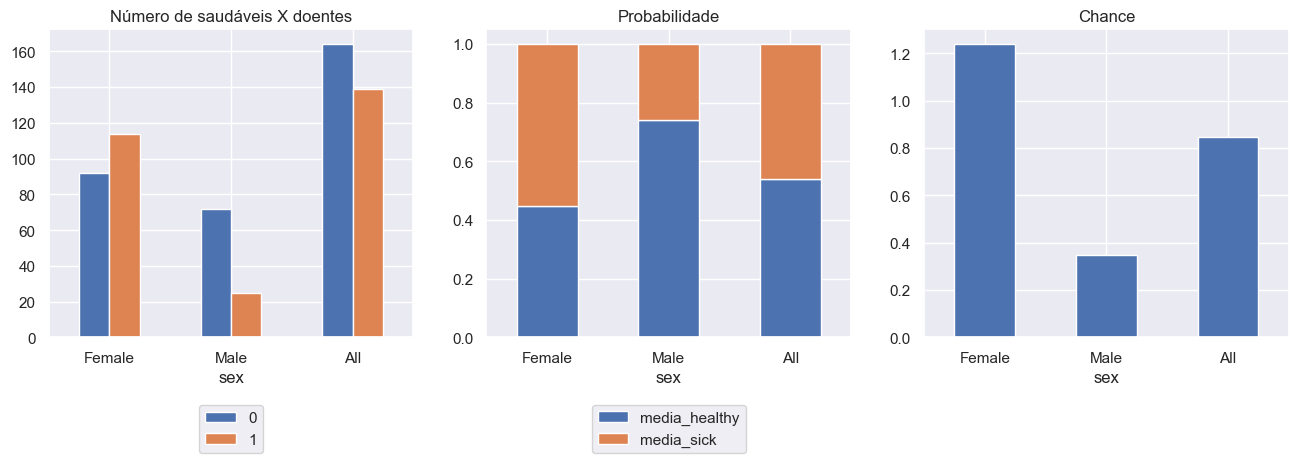

In [17]:
sns.set_theme()

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,4))

ax0 = tab[[0, 1]].plot.bar(ax=axes[0])
ax0.set_title(label='Número de saudáveis X doentes')
ax0.set_xlabel(xlabel='sex')
ax0.set_xticklabels(labels=['Female', 'Male', 'All'], rotation=0)
ax0.legend(labels=[0, 1], loc=8, bbox_to_anchor=(0.5, -.4))

ax1 = tab[['media_healthy', 'media_sick']].plot.bar(ax=axes[1], stacked=True)
ax1.set_title(label='Probabilidade')
ax1.set_xlabel(xlabel='sex')
ax1.set_xticklabels(labels=['Female', 'Male', 'All'], rotation=0)
ax1.legend(labels=['media_healthy', 'media_sick'], loc=8, bbox_to_anchor=(0.5, -.4))

ax2 = tab['Odds'].plot.bar(ax=axes[2])
ax2.set_title(label='Chance')
ax2.set_xlabel(xlabel='sex')
ax2.set_xticklabels(labels=['Female', 'Male', 'All'], rotation=0)

plt.show()

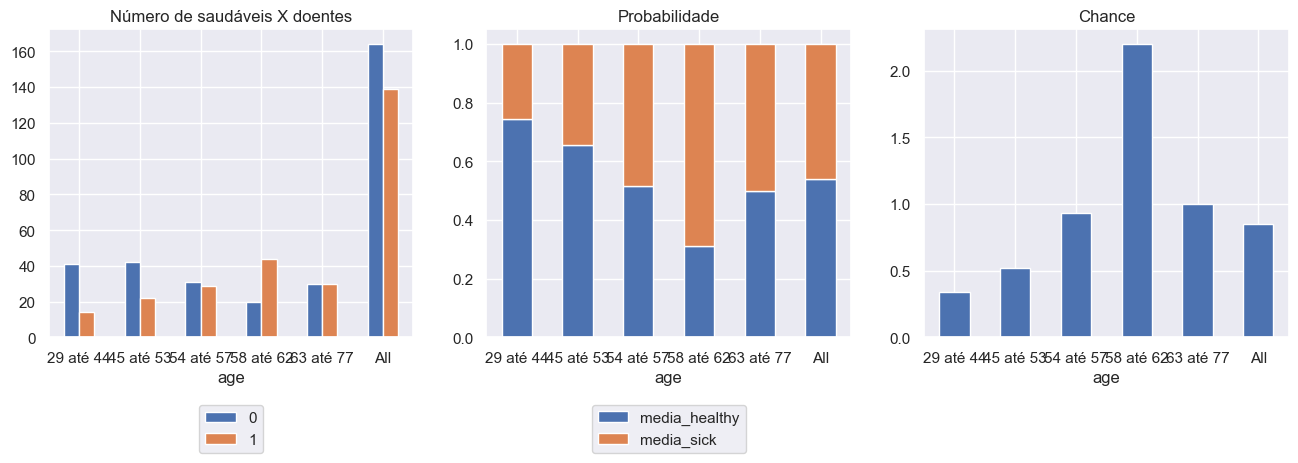

In [18]:
sns.set_theme()

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,4))

ax0 = tab_age[[0, 1]].plot.bar(ax=axes[0])
ax0.set_title(label='Número de saudáveis X doentes')
ax0.set_xlabel(xlabel='age')
ax0.set_xticklabels(labels=['29 até 44', '45 até 53', '54 até 57', '58 até 62', '63 até 77', 'All'], rotation=0)
ax0.legend(labels=[0, 1], loc=8, bbox_to_anchor=(0.5, -.4))

ax1 = tab_age[['media_healthy', 'media_sick']].plot.bar(ax=axes[1], stacked=True)
ax1.set_title(label='Probabilidade')
ax1.set_xlabel(xlabel='age')
ax1.set_xticklabels(labels=['29 até 44', '45 até 53', '54 até 57', '58 até 62', '63 até 77', 'All'], rotation=0)
ax1.legend(labels=['media_healthy', 'media_sick'], loc=8, bbox_to_anchor=(0.5, -.4))

ax2 = tab_age['Odds'].plot.bar(ax=axes[2])
ax2.set_title(label='Chance')
ax2.set_xlabel(xlabel='age')
ax2.set_xticklabels(labels=['29 até 44', '45 até 53', '54 até 57', '58 até 62', '63 até 77', 'All'], rotation=0)

plt.show()